# Assignment

## Part 1: Data PreProcessing and Analysis 

#### This part have data cleaning and feature engineering, binning features to get detailed insights in customer profile and analysis. For data reduction and model building, the original data is used without any new added features.

### Importing libraries and reading files

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("G:/Softsensor/Data for Associate DS.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.shape

(8950, 18)

### Data Pre- Processing and EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

#### MINIMUM_PAYMENTS and CREDIT_LIMIT column has null values and their number is very small so we can impute the null values with median.

In [5]:
#imputing null value with median
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna( data['MINIMUM_PAYMENTS'].median() )
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna( data['CREDIT_LIMIT'].median() )

data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [6]:
#EDA
summary = data.describe()
summary

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
original_data = data.copy()

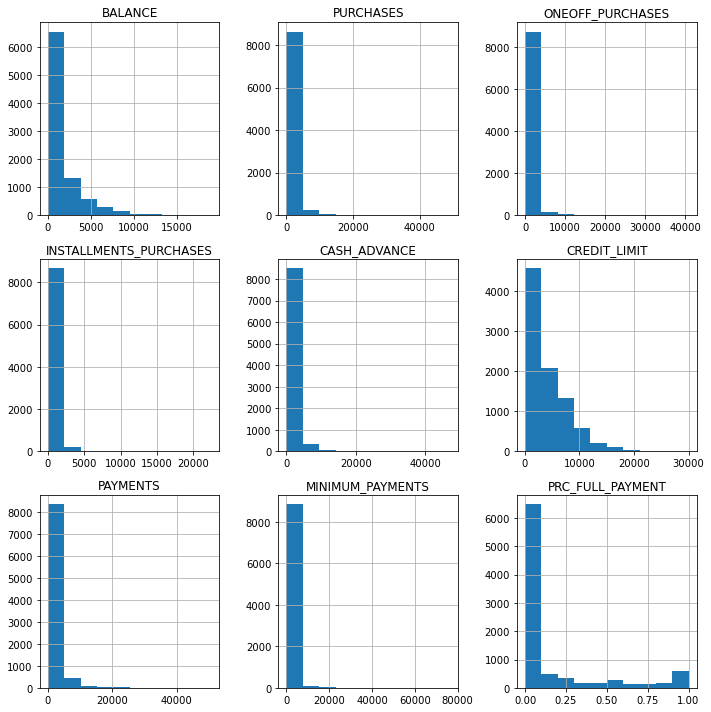

In [70]:
data[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']].hist(figsize=(10,10))

plt.tight_layout()

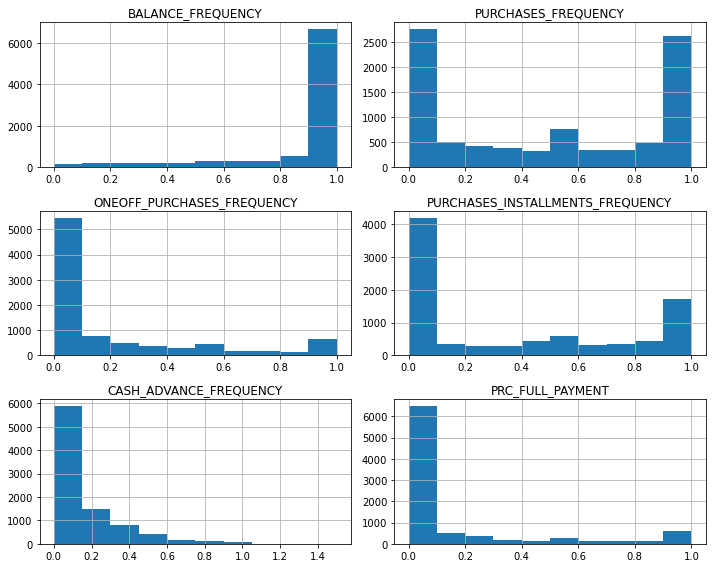

In [68]:
#Frequency variables in charts

data[['BALANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
'PRC_FULL_PAYMENT']].hist(figsize=(10,8))
plt.tight_layout()

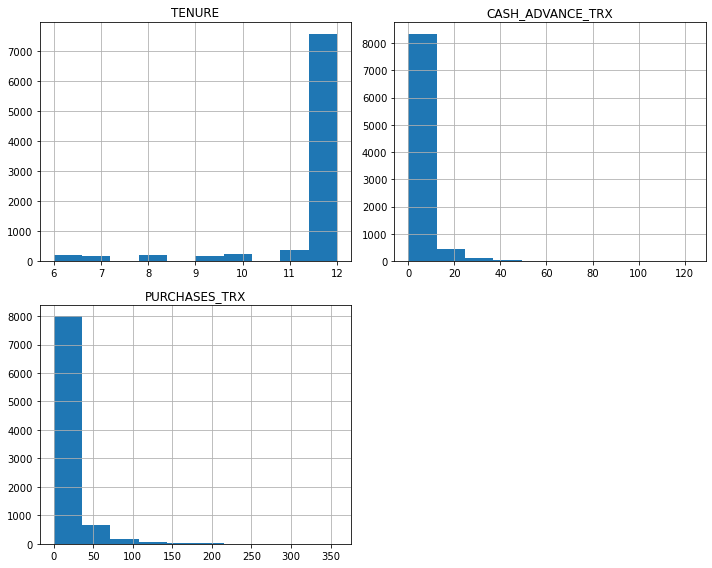

In [69]:
data[['TENURE','CASH_ADVANCE_TRX', 'PURCHASES_TRX']].hist(figsize=(10,8))
plt.tight_layout()

In [5]:
#monthly avg purchases
data['monthly_avg_purchase'] = data['PURCHASES']/data['TENURE']

In [6]:
data['monthly_avg_purchase'].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: monthly_avg_purchase, dtype: float64

In [7]:
data['avg_cash_advance'] = data['CASH_ADVANCE']/data['TENURE']
data['avg_cash_advance'].head()

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: avg_cash_advance, dtype: float64

In [10]:
#avg cash advance per transaction
data['CASH_ADVANCE_TRX'].sum() # total cash advance 29077
data['CASH_ADVANCE'].sum()  #8960896.45
data['CASH_ADVANCE'].sum()/data['CASH_ADVANCE_TRX'].sum()

301.29987469704577

In [11]:
data['PURCHASES_TRX'].sum()  # total purchase transaction

131653

In [12]:
data['PURCHASES'].sum(), data['ONEOFF_PURCHASES'].sum(), data['INSTALLMENTS_PURCHASES'].sum()

(8978683.26, 5302314.470000001, 3679055.42)

In [13]:
#Avg purchase per transaction
data['PURCHASES'].sum()/data['PURCHASES_TRX'].sum()

68.19961003547203

In [14]:
percent_contrib = (data['ONEOFF_PURCHASES'].sum()/data['PURCHASES'].sum())*100
percent_contrib
#out of total purchase amount, around 60% is made for oneoff_purchases.

59.054477326556245

In [15]:
#around 50% of credit card holders have only avg balance less than or equal to 873.38
data[data['BALANCE'] <= 873.38].shape

(4475, 18)

In [16]:
zero_balance = data[data['BALANCE'] == 0]
zero_balance.shape
#80 have 0 avg balance in theri account. Their utilization rate is high.

(80, 18)

In [17]:
zero_balance.describe()
#Cluster_3 have these records.
#Less avg balance in account means tenure is high.
#Less avg balance or 0 made most of the purchases around 300 rs.
#Credit limit 4k 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,80.0,80.0,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,0.0,0.0,267.256750,70.872125,196.384625,21.566645,0.531450,0.025963,0.505373,0.010561,0.112500,6.987500,3066.250000,625.544639,291.343605,0.002922,11.625000
std,0.0,0.0,382.987062,331.237705,242.480504,73.728033,0.390859,0.115764,0.399528,0.030556,0.317974,6.080668,1742.829342,1905.284668,74.541609,0.018823,1.151499
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,13.395434,0.000000,7.000000
25%,0.0,0.0,54.637500,0.000000,19.130000,0.000000,0.121528,0.000000,0.083333,0.000000,0.000000,1.000000,1725.000000,0.000000,312.343947,0.000000,12.000000
50%,0.0,0.0,143.700000,0.000000,124.235000,0.000000,0.541667,0.000000,0.477272,0.000000,0.000000,6.500000,2700.000000,98.686527,312.343947,0.000000,12.000000
75%,0.0,0.0,300.000000,0.000000,269.850000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,12.000000,4000.000000,390.558990,312.343947,0.000000,12.000000
max,0.0,0.0,2600.000000,2600.000000,1027.920000,465.571691,1.000000,1.000000,1.000000,0.142857,1.000000,36.000000,9000.000000,14229.882480,312.343947,0.142857,12.000000


In [18]:
zero_payments = data[data['PAYMENTS'] == 0]
zero_payments.shape
#240 customer whi have not made a single payment.
# have low balance avg
# some also have not made any purchases


(240, 18)

In [19]:
#payment ratio
data['Payment_ratio'] = data['PAYMENTS']/data['MINIMUM_PAYMENTS']


Text(0.5, 1.0, 'Correlation between different features')

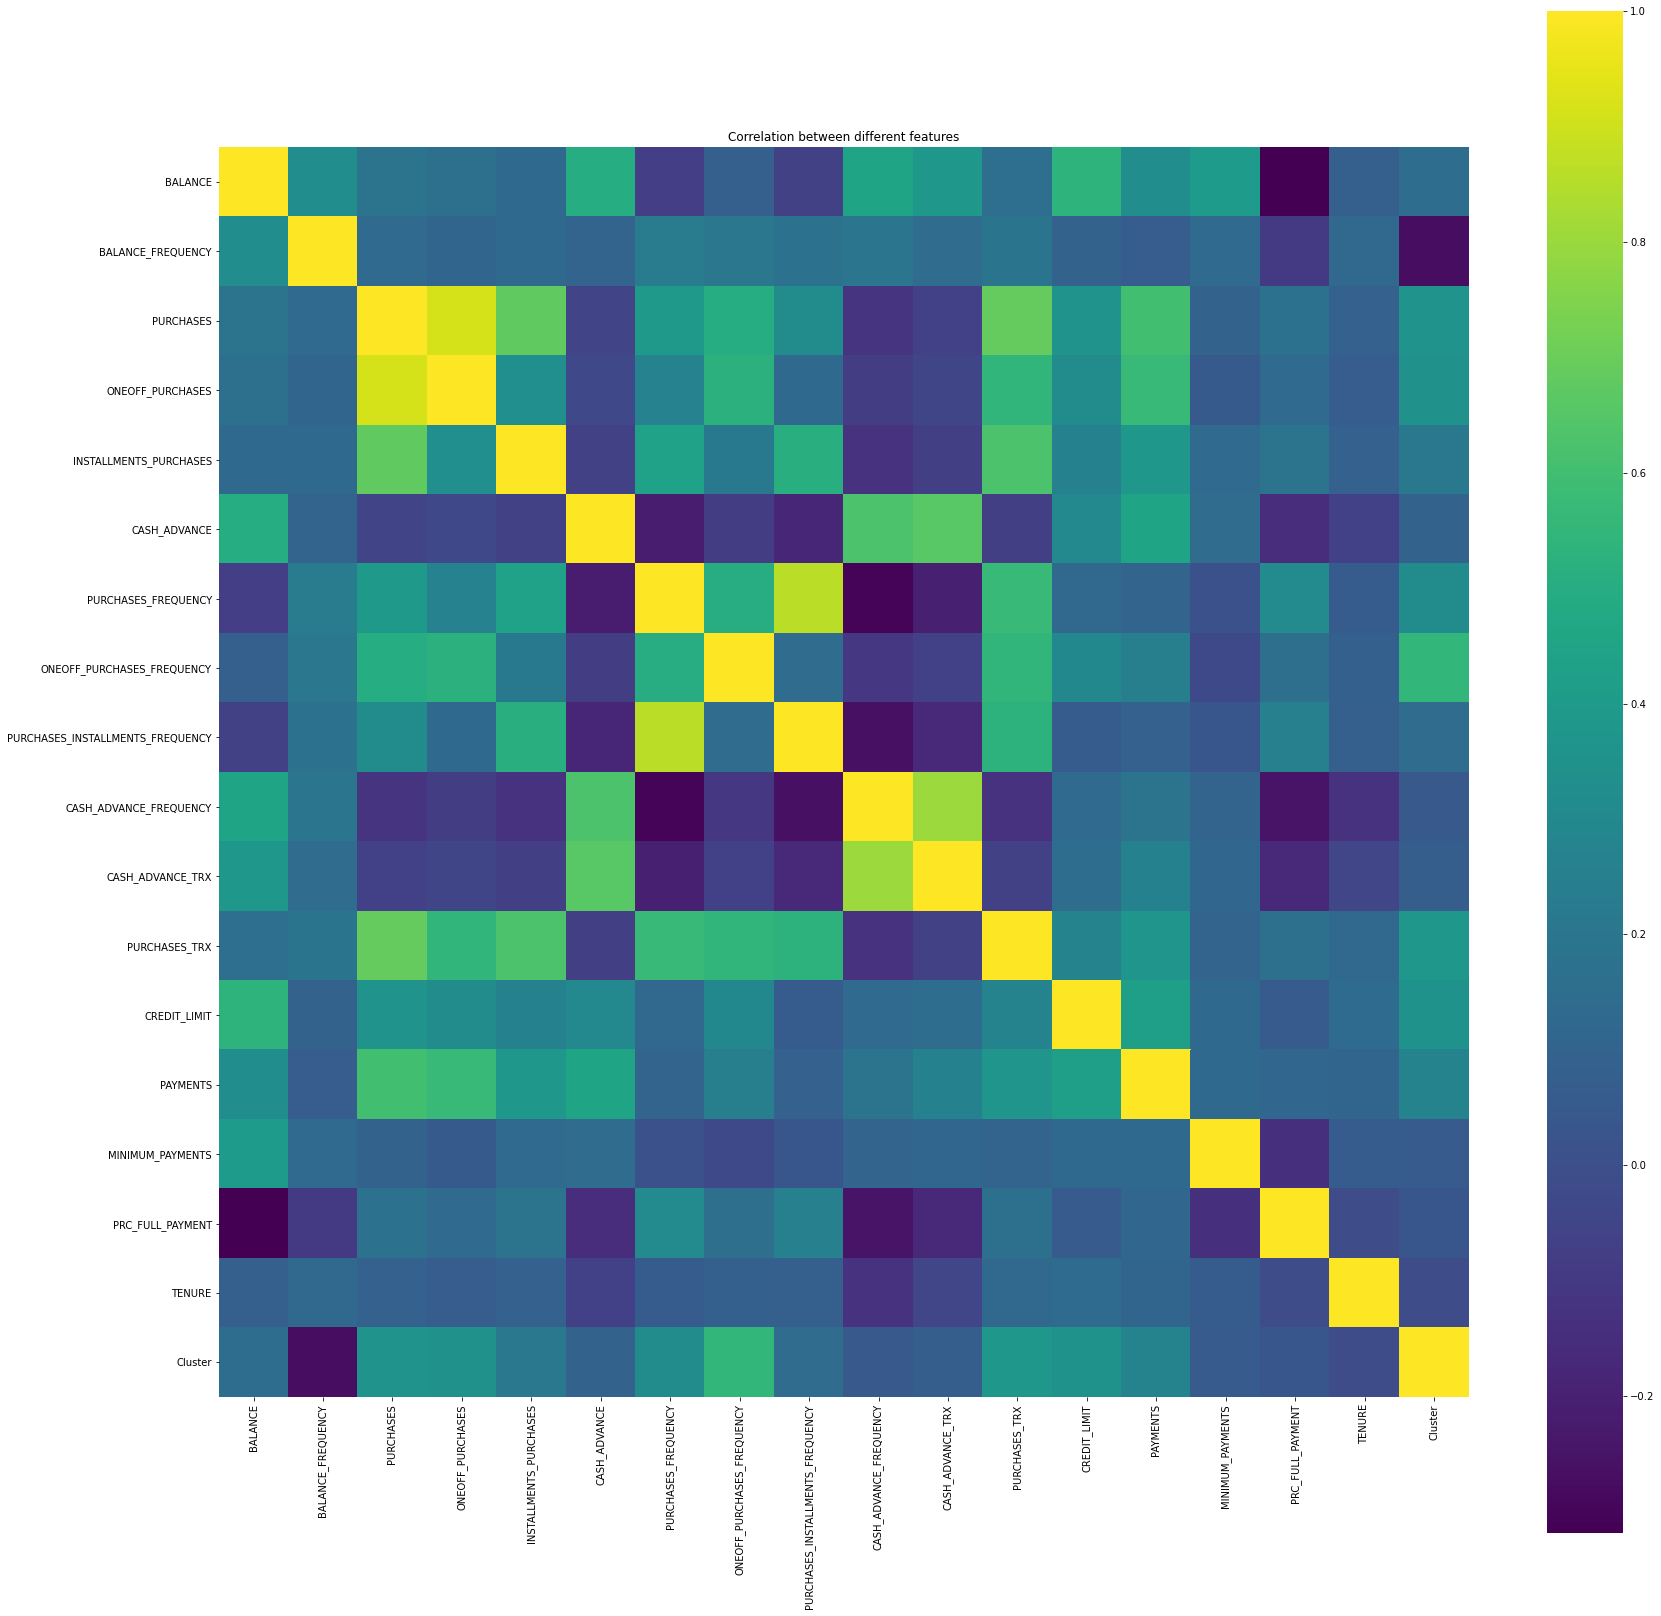

In [73]:
#check the correlation between the variables
import matplotlib.pyplot as plt
import seaborn as sns
correlation = original_data.corr()
plt.figure(figsize=(28,28))
sns.heatmap(correlation, square=True,cmap='viridis')
plt.title('Correlation between different features')

In [21]:
bins = [-1, 128.28, 873.38, 2054.14, 25000]
labels = [1,2,3,4]
data['binned_balance'] = pd.cut(data['BALANCE'], bins=bins, labels=labels)
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Payment_ratio,binned_balance
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1.446508,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3.826241,4
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0.991682,4
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0.000000,3
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2.771075,2


In [22]:
#credit_limit bins
data['credit_qcut'] = pd.qcut(data.CREDIT_LIMIT, q=4, 
                        labels=['VeryLow', 
                                'Low', 
                                'medium',  
                                'high'])
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Payment_ratio,binned_balance,credit_qcut
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12,1.446508,1,VeryLow
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3.826241,4,high
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,0.991682,4,high
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,1,7500.0,0.000000,312.343947,0.000000,12,0.000000,3,high
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,0,1,1200.0,678.334763,244.791237,0.000000,12,2.771075,2,VeryLow


In [23]:
data['utilization_ratio'] = (data['CREDIT_LIMIT'] - data['BALANCE'])/data['CREDIT_LIMIT']
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Payment_ratio,binned_balance,credit_qcut,utilization_ratio
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,2,1000.0,201.802084,139.509787,0.000000,12,1.446508,1,VeryLow,0.959099
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,3.826241,4,high,0.542505
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,0.991682,4,high,0.667313
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,7500.0,0.000000,312.343947,0.000000,12,0.000000,3,high,0.777777
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,2.771075,2,VeryLow,0.318571


In [24]:
data[data['utilization_ratio'] == 1.00].shape

(80, 22)

In [25]:
bins = [-15,0, 0.30, 0.50, 1]
labels = ['LessThan0','Lessthan30%','30%-50%','50%-100%']
data['binned_utilization'] = pd.cut(data['utilization_ratio'], bins=bins, labels=labels)
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Payment_ratio,binned_balance,credit_qcut,utilization_ratio,binned_utilization
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,1000.0,201.802084,139.509787,0.000000,12,1.446508,1,VeryLow,0.959099,50%-100%
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,7000.0,4103.032597,1072.340217,0.222222,12,3.826241,4,high,0.542505,50%-100%
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,0.991682,4,high,0.667313,50%-100%
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,7500.0,0.000000,312.343947,0.000000,12,0.000000,3,high,0.777777,50%-100%
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,2.771075,2,VeryLow,0.318571,30%-50%


In [26]:
data[data['binned_utilization']== 'LessThan0'].shape

(227, 23)

In [27]:
data['binned_balance'].value_counts()

4    2238
1    2238
3    2237
2    2237
Name: binned_balance, dtype: int64

<AxesSubplot:title={'center':'BALANCE_FREQUENCY'}, xlabel='binned_balance'>

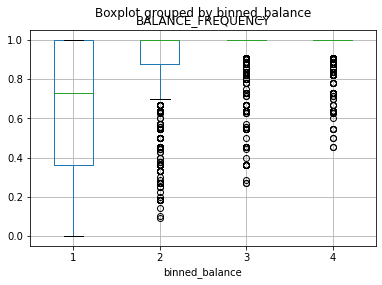

In [28]:
data.boxplot(column = 'BALANCE_FREQUENCY',by = 'binned_balance')

In [29]:
#balance to credit limit ratio
data['balance/limit'] = data['BALANCE']/data['CREDIT_LIMIT']
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Payment_ratio,binned_balance,credit_qcut,utilization_ratio,binned_utilization,balance/limit
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,201.802084,139.509787,0.000000,12,1.446508,1,VeryLow,0.959099,50%-100%,0.040901
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,4103.032597,1072.340217,0.222222,12,3.826241,4,high,0.542505,50%-100%,0.457495
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,622.066742,627.284787,0.000000,12,0.991682,4,high,0.667313,50%-100%,0.332687
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,0.000000,312.343947,0.000000,12,0.000000,3,high,0.777777,50%-100%,0.222223
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,678.334763,244.791237,0.000000,12,2.771075,2,VeryLow,0.318571,30%-50%,0.681429


In [30]:
data['balance/limit'].describe()

count    8950.000000
mean        0.388884
std         0.389722
min         0.000000
25%         0.041494
50%         0.302720
75%         0.717571
max        15.909951
Name: balance/limit, dtype: float64

## Part 2: Data Reduction using PCA and KMeans Clustering

In [31]:
data_df = original_data.copy()

In [32]:
#drop columns
data_df.drop(['CUST_ID'],axis =1, inplace = True)

In [33]:
data_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_df)

In [44]:
norm = Normalizer()
normalized_df = norm.fit_transform(scaled_data)
normalized_df = pd.DataFrame(normalized_df)
normalized_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.312090,-0.106349,-0.181160,-0.152182,-0.148833,-0.199018,-0.343854,-0.289353,-0.301569,-0.287941,-0.202977,-0.218012,-0.409466,-0.225535,-0.128931,-0.224073,0.153779
1,0.219912,0.037536,-0.131214,-0.099743,-0.127029,0.728121,-0.341413,-0.189648,-0.256249,0.160391,0.030760,-0.165374,0.192447,0.228765,0.027246,0.065453,0.100790
2,0.126690,0.146792,-0.030506,0.030852,-0.128798,-0.132258,0.359794,0.757488,-0.259819,-0.191351,-0.134888,-0.030889,0.234065,-0.108746,-0.026433,-0.148908,0.102194
3,0.020495,-0.424496,0.096865,0.227990,-0.189749,-0.153883,-0.423316,-0.166684,-0.382772,-0.108075,-0.137554,-0.230234,0.344830,-0.249904,-0.095300,-0.219375,0.150555
4,-0.151657,0.218998,-0.195318,-0.146804,-0.192153,-0.197314,-0.428679,-0.168795,-0.387621,-0.285475,-0.201239,-0.233151,-0.382724,-0.154021,-0.108749,-0.222155,0.152462


In [36]:
normalized_df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

### Dimensionality reduction: PCA

In [45]:
#dimentionality reduction
#PCA
# Fitting the PCA on the data

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(normalized_df)

PCA()

Text(0, 0.5, 'Cumulative explained variance')

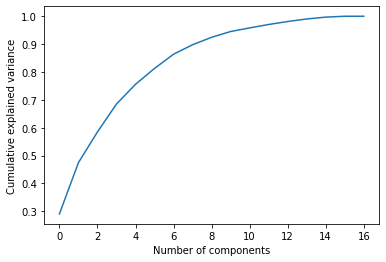

In [46]:
# Plotting relation between components and variance
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
#plt.annotate('15',xy=(15, .90))

In [47]:
# Minimum number of components for which the variance is around 90% is 8

pca.explained_variance_ratio_[:8].sum()

0.8976839688649891

In [48]:
# consider first 8 components as they are explaining the 90% of variation in the data

x_pca = PCA(n_components=8)
data_pca = x_pca.fit_transform(normalized_df)

Text(0.5, 1.0, 'Correlation between different features')

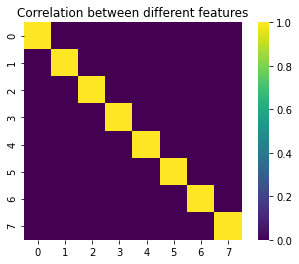

In [49]:
# correlation between the variables after transforming the data with PCA is 0

correlation = pd.DataFrame(data_pca).corr()
sns.heatmap(correlation, vmax=1, square=True,cmap='viridis')
plt.title('Correlation between different features')

### KMeans Clustering

In [52]:
#KMeans clustering
#let's build clusters
from sklearn.cluster import KMeans
num_of_clusters = range(2,15)
error = []

for num_clusters in num_of_clusters:
    clusters = KMeans(num_clusters)
    clusters.fit(data_pca)
    error.append(clusters.inertia_/100)
    
df=pd.DataFrame({"Cluster_Numbers":num_of_clusters, "Error_Term":error})

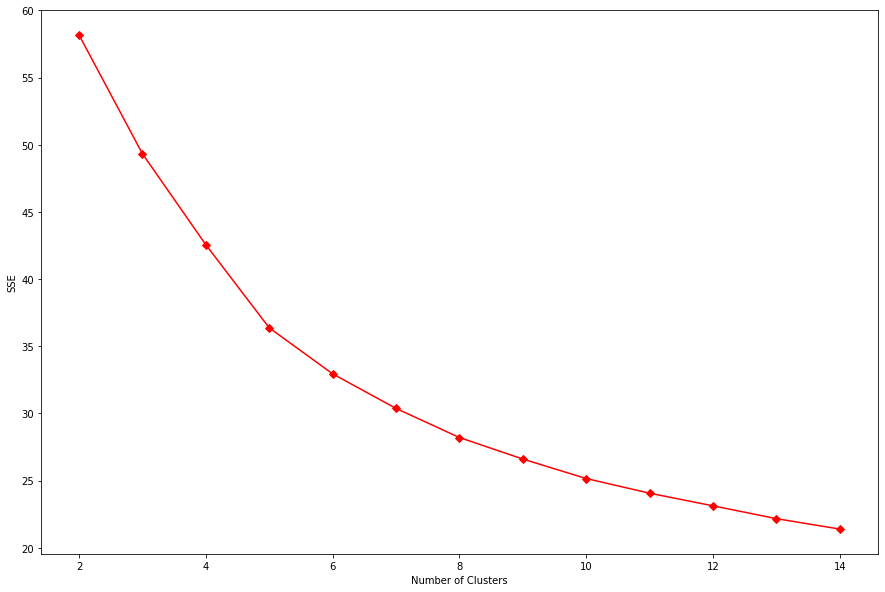

In [53]:
#Find the right number of clusters
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,10))
plt.plot(df.Cluster_Numbers, df.Error_Term, marker = "D", color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [54]:
#Choosing 6 number of clusters
clusters = KMeans(6)
clusters.fit(data_pca)
clusters.labels_

array([0, 3, 5, ..., 1, 4, 4])

In [57]:
original_data['Cluster'] = clusters.labels_
original_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,4
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [ ]:
original_data['data6Clusters.csv',index = False]

In [59]:
clusters = pd.read_csv('G:/Softsensor/data6Clusters.csv')

In [60]:
clusters['utilization_ratio'] = (clusters['CREDIT_LIMIT'] - clusters['BALANCE'])/clusters['CREDIT_LIMIT']
clusters.head()
clusters.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,utilization_ratio
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318,2.622346,0.611116
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331,1.743770,0.389722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000,-14.909951
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,1.000000,0.282429
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000,3.000000,0.697280
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000,4.000000,0.958506
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,5.000000,1.000000


In [61]:
Cluster_0 = clusters[clusters['Cluster'] == 0] 

In [62]:
Cluster_0.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,utilization_ratio
count,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.0,1755.000000
mean,1956.768872,0.975809,3289.184365,2255.431071,1034.123094,405.623782,0.884376,0.687854,0.555081,0.060507,1.332194,43.516239,6901.686092,3281.019641,1056.414910,0.247507,11.914530,0.0,0.679458
std,2332.519984,0.076934,3891.030743,3147.009330,1668.278387,1181.370822,0.171272,0.276163,0.391339,0.126036,3.616235,40.621331,4280.687836,4205.882524,3435.729249,0.358771,0.468616,0.0,0.299053
min,1.198223,0.181818,8.400000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,2.000000,300.000000,0.000000,3.197940,0.000000,6.000000,0.0,-1.033580
25%,334.585144,1.000000,1293.895000,768.010000,81.040000,0.000000,0.833333,0.500000,0.166667,0.000000,0.000000,18.000000,4000.000000,1165.087270,188.291759,0.000000,12.000000,0.0,0.495983
50%,1088.031913,1.000000,2286.060000,1430.920000,524.120000,0.000000,1.000000,0.727273,0.583333,0.000000,0.000000,31.000000,6200.000000,2082.619124,334.180282,0.000000,12.000000,0.0,0.765552
75%,2755.251170,1.000000,3890.175000,2569.145000,1322.785000,139.849682,1.000000,1.000000,1.000000,0.083333,1.000000,53.000000,9000.000000,3873.701274,922.856627,0.416667,12.000000,0.0,0.935635
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,19513.474830,1.000000,1.000000,1.000000,1.000000,48.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,0.0,0.999800


In [63]:
Cluster_1 = clusters[clusters['Cluster'] == 1]
Cluster_1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,utilization_ratio
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.0,688.000000
mean,805.223700,0.791970,414.289593,253.691541,161.102413,983.196783,0.425068,0.122219,0.284578,0.173885,2.860465,5.396802,2437.747093,621.548940,336.672383,0.163418,7.478198,1.0,0.650223
std,1029.616220,0.239135,606.752395,552.100060,278.090096,1417.608949,0.387021,0.202350,0.351173,0.199681,3.940349,6.999550,2175.192811,1157.315239,568.184780,0.313005,1.257104,0.0,0.320440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.311953,0.000000,6.000000,1.0,-0.069448
25%,64.088610,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1200.000000,143.987243,99.974467,0.000000,6.000000,1.0,0.356909
50%,449.027177,0.857143,186.315000,0.000000,0.000000,322.222215,0.333333,0.000000,0.000000,0.125000,1.000000,4.000000,1500.000000,298.052723,179.284139,0.000000,7.000000,1.0,0.734710
75%,1117.876944,1.000000,551.820000,234.625000,228.555000,1435.792250,0.833333,0.166667,0.666667,0.285714,4.000000,8.000000,3000.000000,637.258138,336.983781,0.200000,8.000000,1.0,0.956351
max,7215.195760,1.000000,4139.560000,4139.560000,2068.150000,10590.411130,1.000000,1.000000,1.000000,1.000000,26.000000,54.000000,14000.000000,19998.389690,7243.733403,1.000000,11.000000,1.0,1.000000


In [64]:
Cluster_2 = clusters[clusters['Cluster'] == 2]
Cluster_2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,utilization_ratio
count,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.0,1561.000000
mean,4010.603772,0.969651,392.210461,238.402108,153.873485,3768.135070,0.240858,0.106548,0.155636,0.437013,12.390135,5.793722,6703.569002,3008.478904,1771.391007,0.032843,11.680333,2.0,0.368532
std,2678.713847,0.089246,733.484778,535.322019,388.229927,3445.911143,0.320105,0.184217,0.282909,0.222330,11.443042,11.060486,3723.072699,3747.702792,3326.555215,0.091309,0.938318,0.0,0.459326
min,51.422178,0.363636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,16.950090,0.000000,6.000000,2.0,-14.909951
25%,1893.053845,1.000000,0.000000,0.000000,0.000000,1665.331678,0.000000,0.000000,0.000000,0.250000,6.000000,0.000000,4000.000000,974.445304,612.068106,0.000000,12.000000,2.0,0.153047
50%,3490.855736,1.000000,51.410000,0.000000,0.000000,2943.653759,0.083333,0.000000,0.000000,0.416667,10.000000,1.000000,6000.000000,1670.662700,1114.588285,0.000000,12.000000,2.0,0.367635
75%,5547.092593,1.000000,468.490000,233.090000,100.010000,4743.715012,0.416667,0.166667,0.166667,0.583333,15.000000,7.000000,9000.000000,3468.135960,1840.913723,0.000000,12.000000,2.0,0.576679
max,16304.889250,1.000000,7194.530000,6678.260000,4059.930000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,104.000000,19600.000000,39048.597620,61031.618600,0.916667,12.000000,2.0,0.994792


In [65]:
Cluster_3 = clusters[clusters['Cluster'] == 3]
Cluster_3.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,utilization_ratio
count,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.0,1903.000000
mean,1270.861482,0.982196,200.201456,163.188271,37.222790,451.918200,0.128655,0.076126,0.052035,0.109574,1.873358,2.270100,2782.553862,769.358181,653.999144,0.015895,11.915922,3.0,0.424026
std,919.341666,0.054536,354.766940,333.042309,124.633352,638.747381,0.159620,0.116994,0.112861,0.108576,2.131147,3.400468,2070.225531,753.798235,1243.638962,0.046200,0.327938,0.0,0.335456
min,1.591980,0.636364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,5.038210,0.000000,10.000000,3.0,-1.325422
25%,596.643485,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1400.000000,316.866575,232.204019,0.000000,12.000000,3.0,0.103936
50%,1127.633173,1.000000,36.000000,0.000000,0.000000,154.311694,0.083333,0.000000,0.000000,0.083333,1.000000,1.000000,2000.000000,540.406147,380.286525,0.000000,12.000000,3.0,0.354462
75%,1699.267776,1.000000,232.865000,167.040000,0.000000,697.965484,0.250000,0.083333,0.000000,0.166667,3.000000,4.000000,3050.000000,906.979930,626.434344,0.000000,12.000000,3.0,0.719202
max,5850.172900,1.000000,3000.000000,2576.000000,3000.000000,3511.369006,0.666667,0.583333,0.500000,0.500000,13.000000,43.000000,13500.000000,6344.618447,19443.453520,0.500000,12.000000,3.0,0.999735


In [66]:
Cluster_4 = clusters[clusters['Cluster'] == 4]
Cluster_4.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,utilization_ratio
count,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.0,1264.000000
mean,124.665870,0.398082,353.460253,207.784984,145.910079,303.436451,0.273750,0.074073,0.192600,0.031065,0.662975,4.441456,3936.353288,1160.383781,190.117237,0.230789,11.837816,4.0,0.955959
std,263.222767,0.213535,479.310458,428.911863,262.986617,801.620055,0.247682,0.117028,0.252570,0.063292,1.751467,4.682785,3219.612610,2506.735618,241.110327,0.340375,0.558354,0.0,0.086417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.019163,0.000000,8.000000,4.0,0.243112
25%,7.439872,0.260101,50.915000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,178.261908,83.683879,0.000000,12.000000,4.0,0.961055
50%,27.729539,0.363636,175.795000,0.000000,30.735000,0.000000,0.250000,0.000000,0.083333,0.000000,0.000000,3.000000,3000.000000,430.497335,138.171468,0.000000,12.000000,4.0,0.991103
75%,99.015638,0.545455,456.212500,220.120000,200.005000,0.000000,0.416667,0.083333,0.333333,0.000000,0.000000,6.000000,5000.000000,1097.163819,239.467061,0.363636,12.000000,4.0,0.997560
max,2461.015559,1.000000,3649.830000,3649.830000,3011.360000,6523.780195,1.000000,1.000000,1.000000,0.416667,23.000000,36.000000,23000.000000,34107.074990,4287.236670,1.000000,12.000000,4.0,1.000000


In [67]:
Cluster_5 = clusters[clusters['Cluster'] == 5]
Cluster_5.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,utilization_ratio
count,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.0,1779.000000
mean,661.802633,0.960221,832.566498,126.003356,707.065267,138.833322,0.886611,0.065154,0.846734,0.030216,0.577291,18.319843,3203.584751,954.903344,689.301222,0.256158,11.890388,5.0,0.696547
std,878.758408,0.100919,700.139969,273.394214,624.626885,435.191959,0.152502,0.109458,0.179897,0.078543,1.621724,12.326068,2440.599293,847.232368,1717.502566,0.342473,0.452232,0.0,0.373612
min,0.892901,0.272727,12.000000,0.000000,12.000000,0.000000,0.416667,0.000000,0.333333,0.000000,0.000000,0.000000,400.000000,0.000000,0.261984,0.000000,9.000000,5.0,-0.718886
25%,59.772859,1.000000,349.960000,0.000000,296.160000,0.000000,0.818182,0.000000,0.750000,0.000000,0.000000,11.000000,1500.000000,376.682968,160.751092,0.000000,12.000000,5.0,0.469386
50%,230.823876,1.000000,589.940000,0.000000,500.000000,0.000000,1.000000,0.000000,0.916667,0.000000,0.000000,13.000000,2500.000000,694.054946,187.794283,0.083333,12.000000,5.0,0.912580
75%,1047.177625,1.000000,1088.225000,126.760000,895.400000,0.000000,1.000000,0.083333,1.000000,0.000000,0.000000,22.000000,4200.000000,1273.536353,512.207845,0.500000,12.000000,5.0,0.978984
max,5920.486917,1.000000,4793.350000,3227.850000,4538.840000,4083.515108,1.000000,0.583333,1.000000,0.666667,14.000000,122.000000,18000.000000,6540.889639,24302.098190,1.000000,12.000000,5.0,0.999881


#### Many plots and graphs are also built with google sheets.
#### We can try feature engineering and convert most of the continous variables to categorical variables(using bins) that will also remove the effect of outliers on our model performance.